<center><h2>Fourier Synthesis </h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
    
<p>
# Fourier.py: Fourier synthesis of sawtooth + interactive slider"

In [4]:
% matplotlib notebook

import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.pyplot import *
% matplotlib notebook

<IPython.core.display.Javascript object>


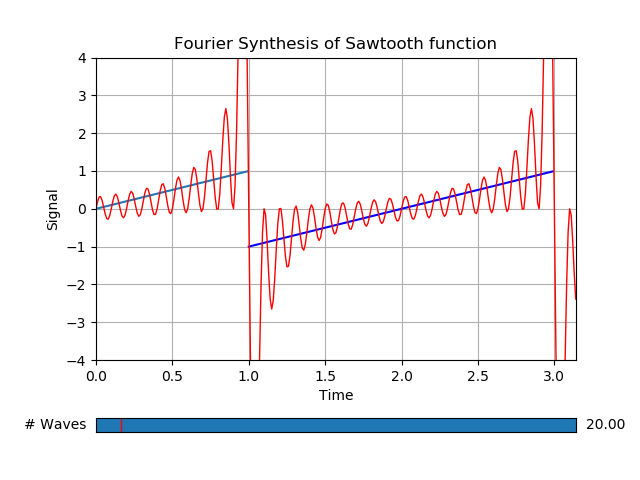

In [5]:
M = 4                                 
T = 2.                                                    # Period 
numwaves =  2
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.25)         # L & B margins
t = np.arange(0.0, np.pi, 0.01)               
t1 = np.arange(0.0,T/2,0.01)               
t2 = t[100:300]                               
f1 = t1                                 
f2 = t2-T                                  
s = 0 
plt.plot(t1,f1)                                 
plt.plot(t2,f2,color='b')           

def Four(M,T,t):         # M = number waves, T = period, t = time
    sumy = 0                                            
    om = 2.*np.pi/T                                    # Omega = 2pi/T
    fac = 1                                     
    for m in range(1,M):         # M variable selected with slider
        sumy += fac* np.sin(m*om*t)                      
        fac = -fac                        
    sumy = (2.0/np.pi)*sumy                           # Common factor
    return sumy

s = Four(M,T,t)                                    # Initial plot   
l, = plt.plot(t,s, lw=1, color='red')
plt.axis([0, np.pi, -4.0, 4.0])             # minx, maxx, miny, maxy
plt.xlabel('Time')                                        
plt.ylabel('Signal')                                      
plt.title('Fourier Synthesis of Sawtooth function')
plt.grid(True)               
axcolor = 'w'       # Slider                    
axnumwaves = plt.axes([0.15, 0.1, 0.75, 0.03], facecolor=axcolor) 
snumwaves = Slider(axnumwaves, '# Waves', 1, 20, valinit=T)  # previous slider -> snumwaves

def hzfunc():     
    hzdict = Four(int(numwaves),T,t)
    ydata = hzdict
    l.set_ydata(ydata)
    plt.draw()

def update(val):                                # Update slider
    global  numwaves                         
    numwaves =int( snumwaves.val)                 
    l.set_ydata(Four(numwaves,T,t))             # Change nwaves
    fig.canvas.draw_idle()

    hzfunc()
snumwaves.on_changed(update)

plt.show()